# EDA Project: My Apple Fitness Health

For my project, I wanted to take a deeper look into my fitness habits in college. In order to maintain and improve my health over the next couple years, I want to find trends that could potentially provide new insight about what I could do better next semseter when I workout. Some questions I may ask are:

* Does weather influence how frequently I workout?
* Does cardio or weight lifting have a greater effect on my calorie count?
* Do higher intensity workouts lower my consistency in going to the gym?

In order to gather some of these answers, it is important to start with a quick analysis of data gathered on my Apple Watch. This dataset is simply an example of the kind of data I will use in the project, so it only has my fitness data tracked from 12/26/2021 - 02/08/2022. For the main project, I will use my data from the whole Spring semester. 

## Load the Data

Analysis must start with loading the data, so that I can work with it in a Python-based environment. The first step is to load `"apple_health_fitness.csv"` into a `pd.DataFrame`. I will use the date as the index for this example.

In [52]:
import pandas as pd

fitness_df = pd.read_csv("apple_health_fitness.csv", index_col="Date")
print(fitness_df.head(5))

            Active Calories  Exercise  Flights  Heart Rate  Max Heart Rate  \
Date                                                                         
2021-12-26           795.75        58        5        52.0             179   
2021-12-27           122.38         0        0        64.0             100   
2021-12-28           440.65        16        0        55.0             150   
2021-12-29           332.06        10        1        56.0             120   
2021-12-30           702.97        21        2        54.0             167   

            Average Heart Rate  Resting Heart Rate  Step Count  Distance  
Date                                                                      
2021-12-26              101.24                60.0       15617      7.63  
2021-12-27               84.99                66.5        2999      1.32  
2021-12-28               81.39                65.0        7685      4.03  
2021-12-29               74.21                60.0        4607      2.27  
202

### Data Attributes

Each day is an instance for this dataset. Every day, my Apple Watch tracked the following data attributes and logged them:

1. **Active Calories**: calories burned from exercise (float)
2. **Exercise**: minutes of exercise each day (int)
3. **Flights**: flights of stairs climbed (int)
4. **Heart Rate**: unknown heart rate calculation (will be deleted in cleaning)
5. **Max Heart Rate**: maximum heart rate of the day in bpm (float)
6. **Average Heart Rate**: average heart rate throughout day in bpm (float)
7. **Resting Heart Rate**: resting heart rate in bpm (float)
8. **Step Count**: steps during day (int)
9. **Distance**: total distance covered in miles (float)

## Clean the Data

Given that the dataset is so small, there is not much that needs to be cleaned. However, the main project will come with more `np.NaN` values that will need to be cleaned. In this example case, the only cleaning that needs to be done is the deletion of the Heart Rate column from the csv file. It is unclear what type of heart rate it has logged, and in this case, it will not be necessary for any data visualization.

For the main project, there is one main issue that could arise. There have been days here and there that I forgot to wear my watch during the day or during a workout. Some questions that will need answering are:

* How should I fill null values in my dataset?
* Is frequency of forgetting to wear my watch common enough where I will need to interpolate?
* How do I take into account times when I am not in my typical schedule such as break?

In [53]:
fitness_df.pop("Heart Rate")

print(fitness_df.head(5))

            Active Calories  Exercise  Flights  Max Heart Rate  \
Date                                                             
2021-12-26           795.75        58        5             179   
2021-12-27           122.38         0        0             100   
2021-12-28           440.65        16        0             150   
2021-12-29           332.06        10        1             120   
2021-12-30           702.97        21        2             167   

            Average Heart Rate  Resting Heart Rate  Step Count  Distance  
Date                                                                      
2021-12-26              101.24                60.0       15617      7.63  
2021-12-27               84.99                66.5        2999      1.32  
2021-12-28               81.39                65.0        7685      4.03  
2021-12-29               74.21                60.0        4607      2.27  
2021-12-30               98.27                73.0       11340      5.38  


## Visualize the Data

To demonstrate possible trends that will be used in the project. There are a couple of `matplotlib.pyplot` graphs that would be helpful depiction. I think one of my favorites for this type of data is a stem plot. This graph will be useful in seeing how my exercise time fluctuates throughout the beginning months of the spring semester. 

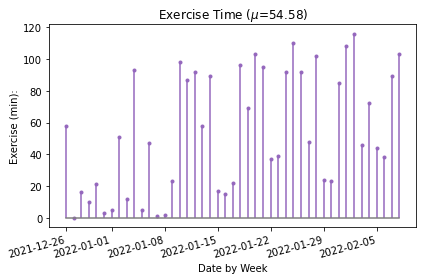

In [55]:
import matplotlib.pyplot as plt

date_ser = fitness_df.index
exercise_ser = fitness_df["Exercise"]

week_count = [0, 6, 13, 20, 27, 34, 41]
week_x_list = []

for i in range(len(date_ser)):
    
    if i in week_count:
        week_x_list.append(date_ser[i])

plt.figure()
plt.stem(date_ser, exercise_ser, linefmt="C4-", markerfmt="C4.", basefmt="C7-")
plt.ylabel("Exercise (min):")
plt.xlabel("Date by Week")
plt.xticks(week_count, week_x_list, rotation=15, ha="right")
plt.title("Exercise Time ($\mu$=" + str(round(exercise_ser.mean(), 2)) + ")")
plt.tight_layout()
plt.show()

From this graph it is clear there is a drastic difference between the amount I work out over Christmas break versus my time at school. Another interesting note is that my school exercise has the same rising and falling shape each week. This shows how the bulk of my exercise happens during the week while I tend to rest on the weekends.